# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


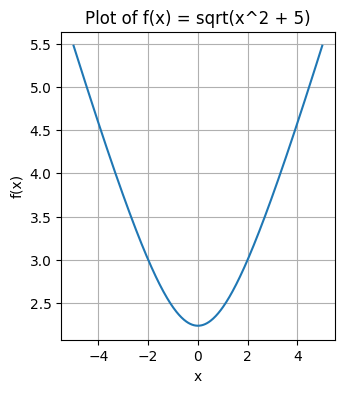

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)
def gradient_f(x):
    return x / np.sqrt(x**2 + 5)
# Plot the function f(x), np.linspace might be helpful.
x = np.linspace(-5, 5, 400)
y = f(x)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = sqrt(x^2 + 5)')
plt.grid(True)



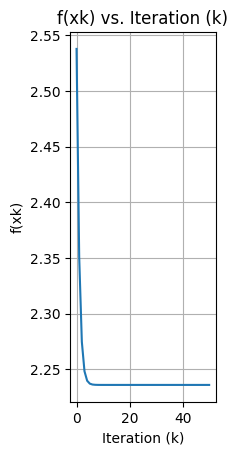

In [10]:
# Define the derivative of the function f(x), for gradient descent
def gradient_descent(initial_guess, step_size, iterations):
# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
    x_k = initial_guess
    x_values = [x_k]
    f_values = [f(x_k)]

    for k in range(iterations):
        x_k = x_k - step_size * gradient_f(x_k)
        x_values.append(x_k)
        f_values.append(f(x_k))

    return x_values, f_values

# set up/assign initial values
T = 50
alpha = 1

# my last sbu id digit is 1, so we get 1/5 + 1 = 1.2
x_0 = 1.2

# Run gradient descent by calling the function
x_values, f_values = gradient_descent(x_0, alpha, T)

# report x_T by printing out the value
x_T = x_values[-1]

# Plot the f(x_k) values vs. iteration number
plt.subplot(1, 3, 2)
plt.plot(range(T + 1), f_values)
plt.xlabel('Iteration (k)')
plt.ylabel('f(xk)')
plt.title('f(xk) vs. Iteration (k)')
plt.grid(True)


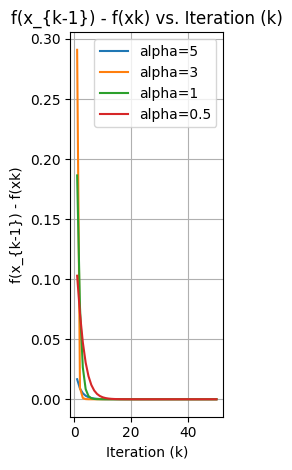

In [11]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
iteration_diffs = []

# loop through the step sizes and perform GD and record results
for step_size in step_sizes:
    x_values, f_values = gradient_descent(x_0, step_size, T)
    iteration_diff = [f_values[k - 1] - f_values[k] for k in range(1, T + 1)]
    iteration_diffs.append(iteration_diff)
plt.subplot(1, 3, 3)
for i, diff in enumerate(iteration_diffs):
    plt.plot(range(1, T + 1), diff, label=f'alpha={step_sizes[i]}')

# plot multiple curves in a single graph
plt.xlabel('Iteration (k)')
plt.ylabel('f(x_{k-1}) - f(xk)')
plt.title('f(x_{k-1}) - f(xk) vs. Iteration (k)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (Bias): 4.1145032556177785
Coefficient for x1: 3.7868502216957847
Coefficient for x2: 0.514787531047275


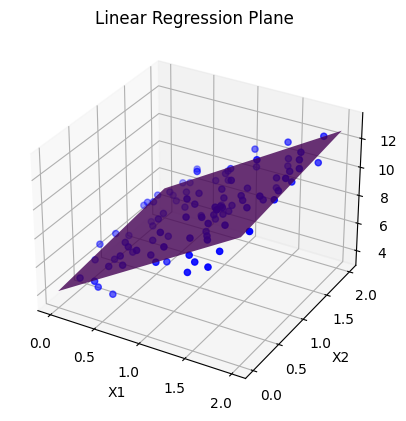

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
n_samples = 100
X_b = np.c_[np.ones((n_samples, 1)), X]

# Find theta using the normal equation
coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


# Print the intercept and coefficients of the regression plane

intercept, coef_x1, coef_x2 = coefficients[0], coefficients[1], coefficients[2]

print(f'Intercept (Bias): {intercept}')
print(f'Coefficient for x1: {coef_x1}')
print(f'Coefficient for x2: {coef_x2}')


# Plot the generated data and the regression plane
x1_grid = np.linspace(0, 2, 100)
x2_grid = np.linspace(0, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
y_predicted = intercept + coef_x1 * x1_grid + coef_x2 * x2_grid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, marker='o', label='Data Points', color='blue')
ax.plot_surface(x1_grid, x2_grid, y_predicted, alpha=0.8, rstride=100, cstride=100, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Linear Regression Plane')

plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

TASK 1:

Learning Rate (learning_rate):

The current value is 5.95.

The current value is 595.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set a random seed for reproducibility
np.random.seed(595)
# Generate random data and true weights and bias
X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

# Calculate probabilities using the true weights and bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# Generate binary labels based on the probabilities
Y = (probabilities > 0.5).astype(int)

# Add some noise to the data
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split the data into training and test sets
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize weights and bias
w = np.zeros(X.shape[0])
b = 0.0

# Set hyperparameters (learning_rate and num_epochs)
learning_rate = 5.95
num_epochs = 595

#doing loop
for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b) # Calculate predictions on the training set

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) #gradients
    dJdb = np.mean(A_train - Y_train)

    w -= learning_rate * dJdw #update weights and bias
    b -= learning_rate * dJdb

# Calculate predictions on the training set
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

# Calculate predictions on the test set
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

#Calculate training and test accuracy
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

#print results
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

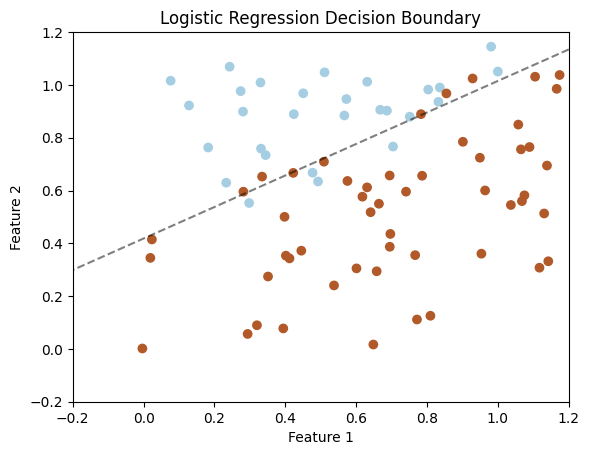

In [17]:
# visualization and doing the training data points plot
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca() # Plot the decision boundary

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

#plotting
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

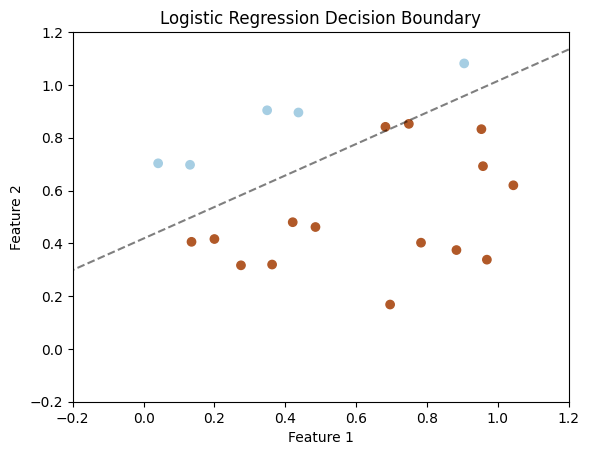

In [18]:
# visualization and doing the training data points plot
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# Create a grid for the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Calculate the decision boundary values
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

#Plotting
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)

 TASK 1. original dataset

Test accuracy: 72.00%


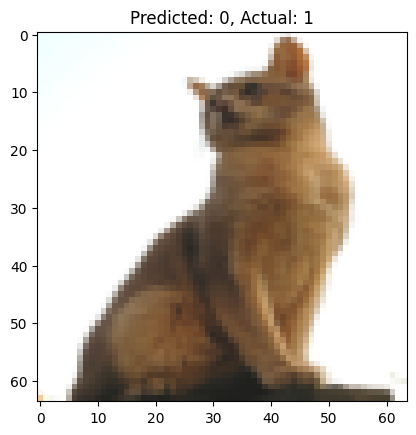

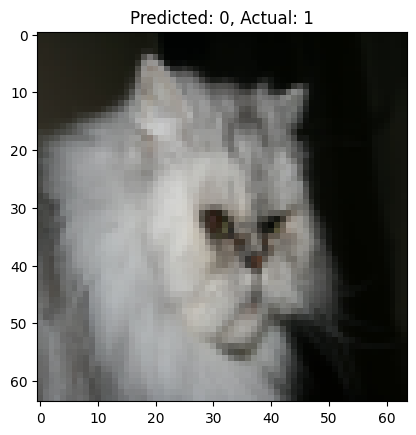

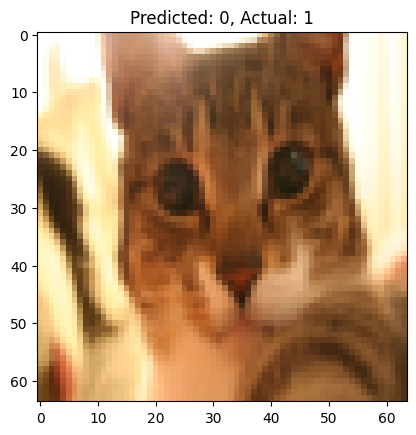

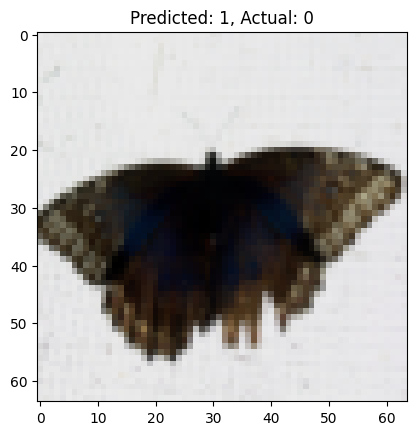

In [12]:
#TASK 1. original dataset
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the original dataset
train_dataset = h5py.File('/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/test_catvnoncat.h5', "r")

# Load the data and labels
X_train = np.array(train_dataset['train_set_x'][:])
y_train = np.array(train_dataset['train_set_y'][:])
X_test = np.array(test_dataset['test_set_x'][:])
y_test = np.array(test_dataset['test_set_y'][:])

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
X_test = X_test.reshape(X_test.shape[0], -1)

# Create and train an SVM model
svm = SVC(kernel='linear')  # You can try different kernels like 'rbf' or 'poly'
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Find indices of incorrect predictions
incorrect_indices = np.where(y_pred != y_test)[0]

# Display 4 of these failed cases for visual examination
for i in range(4):
    index = incorrect_indices[i]
    plt.imshow(X_test[index].reshape(64, 64, 3))
    plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test[index]}")
    plt.show()


TASK 2. Modified Dataset

Test accuracy on the modified dataset: 45.83%


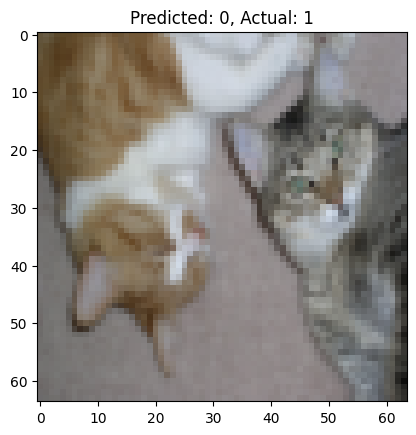

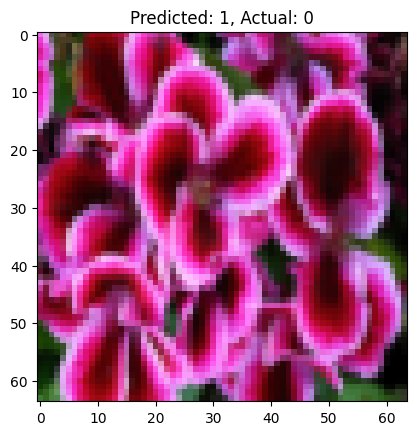

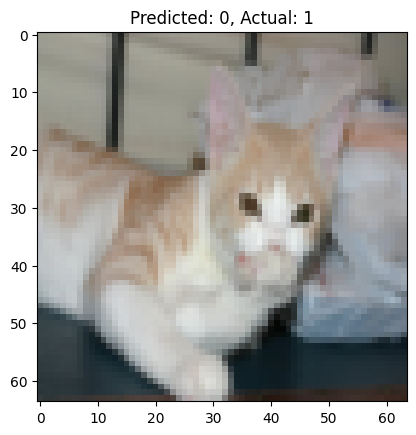

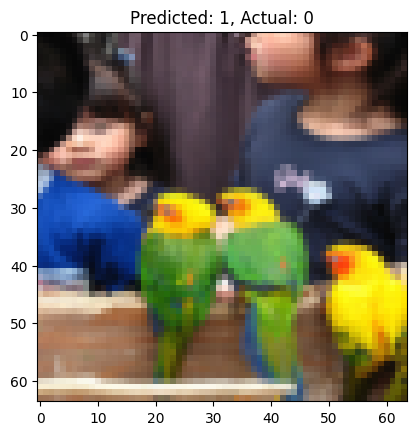

In [14]:
#TASK 2. Modified Dataset
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the original dataset
#train_dataset = h5py.File('train_catvnoncat.h5', "r")

# Load the data and labels
X_original = np.array(train_dataset['train_set_x'][:])
y_original = np.array(train_dataset['train_set_y'][:])

# Define your student ID (replace 'X' with your actual ID)
student_id = "112736761"

# Extract the last digit of your student ID
last_digit = int(student_id[-1])

# Define the split point for the modified dataset
split_point = 160 + last_digit

# Create the modified training and test sets
X_train_modified = X_original[:split_point]
y_train_modified = y_original[:split_point]
X_test_modified = X_original[split_point:]
y_test_modified = y_original[split_point:]

# Preprocess the data
X_train_modified = X_train_modified.reshape(X_train_modified.shape[0], -1)
X_test_modified = X_test_modified.reshape(X_test_modified.shape[0], -1)

# Create and train an SVM model
svm = SVC(kernel='linear')  # You can try different kernels like 'rbf' or 'poly'
svm.fit(X_train_modified, y_train_modified)

# Make predictions on the modified test set
y_pred_modified = svm.predict(X_test_modified)

# Calculate test accuracy
test_accuracy_modified = accuracy_score(y_test_modified, y_pred_modified)
print(f"Test accuracy on the modified dataset: {test_accuracy_modified * 100:.2f}%")

# Find indices of incorrect predictions
incorrect_indices_modified = np.where(y_pred_modified != y_test_modified)[0]

# Display 4 of these misclassified images for further examination
for i in range(4):
    index = incorrect_indices_modified[i]
    plt.imshow(X_test_modified[index].reshape(64, 64, 3))
    plt.title(f"Predicted: {y_pred_modified[index]}, Actual: {y_test_modified[index]}")
    plt.show()
